In [8]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
import nltk 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [9]:
file_path= r'C:\Users\khawl\Desktop\5SAE2\PFE\CRM\backend\IA\DATASET\statsfinal.csv'
df = pd.read_csv(file_path, encoding='latin-1')  
print(df.head())


   Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04  


In [10]:
df = df.rename(columns={'Unnamed: 0': 'id'})
print(df.head())



   id        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
0   0  13-06-2010  5422  3725   576   907  17187.74  23616.50   3121.92   
1   1  14-06-2010  7047   779  3578  1574  22338.99   4938.86  19392.76   
2   2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   3224.90   
3   3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66  17018.80   
4   4  17-06-2010  3668  3207  2184   708  11627.56  20332.38  11837.28   

       S-P4  
0   6466.91  
1  11222.62  
2   8163.85  
3  11921.36  
4   5048.04  


In [11]:
#but in plot we have 1000 2000 3000 4000  so we must convert in datetime 

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

df.dropna(subset=['Date'], inplace=True)

df.set_index('Date', inplace=True)

print(df.head())



            id  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3      S-P4
Date                                                                          
2010-06-13   0  5422  3725   576   907  17187.74  23616.50   3121.92   6466.91
2010-06-14   1  7047   779  3578  1574  22338.99   4938.86  19392.76  11222.62
2010-06-15   2  1572  2082   595  1145   4983.24  13199.88   3224.90   8163.85
2010-06-16   3  5657  2399  3140  1672  17932.69  15209.66  17018.80  11921.36
2010-06-17   4  3668  3207  2184   708  11627.56  20332.38  11837.28   5048.04


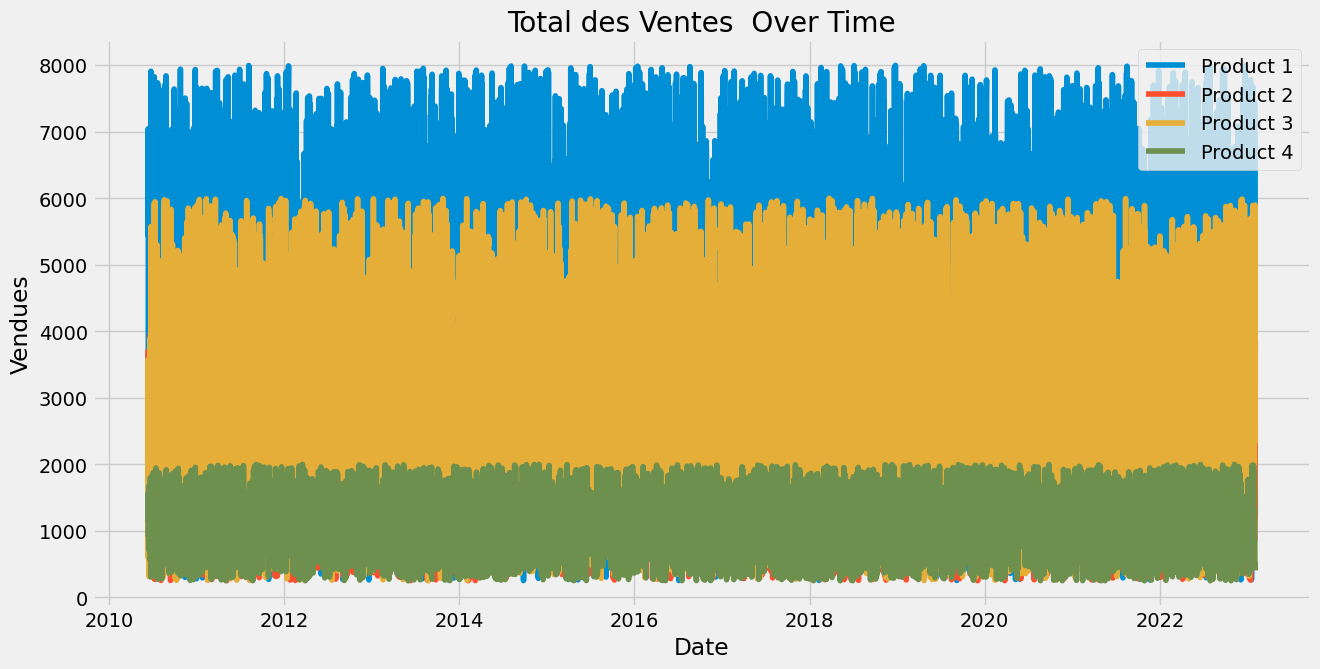

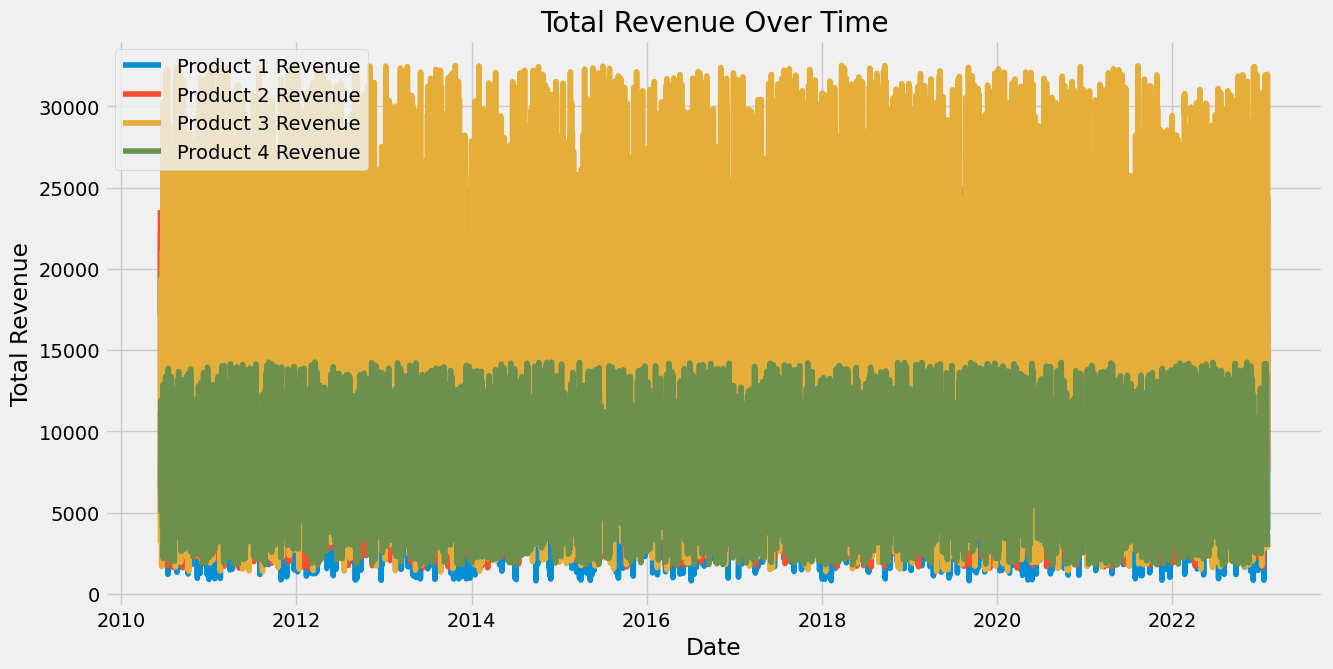

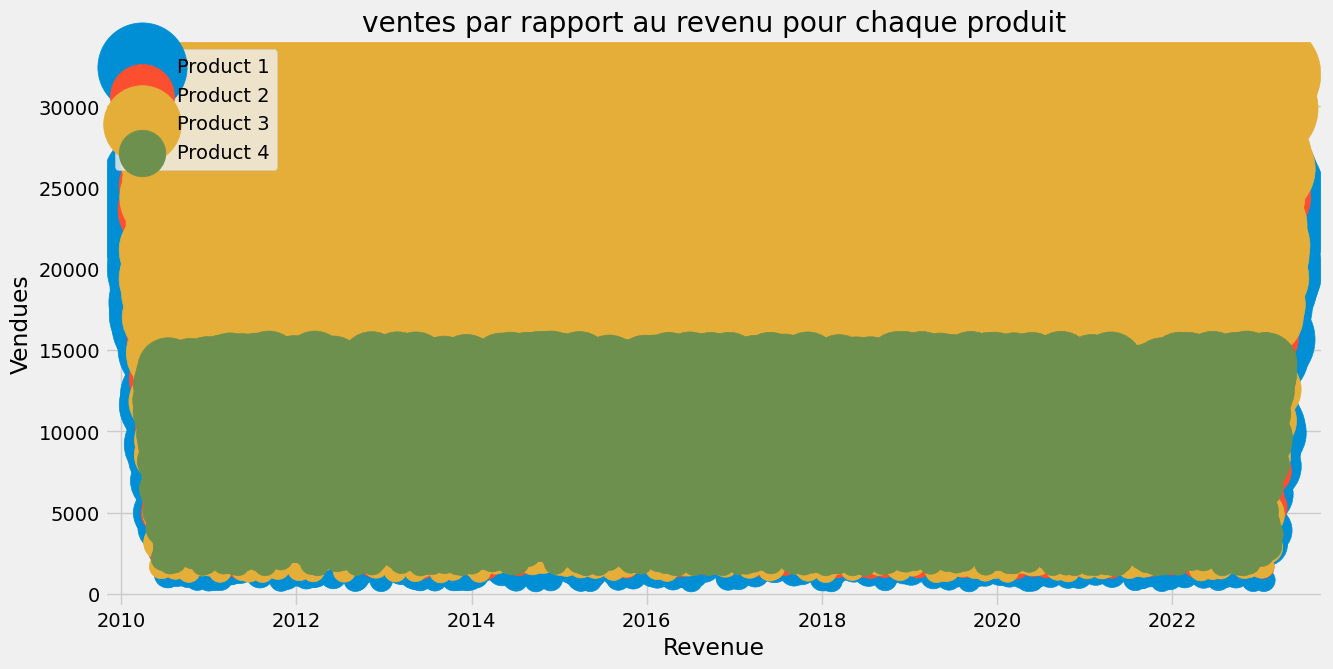

In [12]:

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Q-P1'], label='Product 1')
plt.plot(df.index, df['Q-P2'], label='Product 2')
plt.plot(df.index, df['Q-P3'], label='Product 3')
plt.plot(df.index, df['Q-P4'], label='Product 4')
plt.title('Total des Ventes  Over Time')
plt.xlabel('Date')
plt.ylabel('Vendues')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['S-P1'], label='Product 1 Revenue')
plt.plot(df.index, df['S-P2'], label='Product 2 Revenue')
plt.plot(df.index, df['S-P3'], label='Product 3 Revenue')
plt.plot(df.index, df['S-P4'], label='Product 4 Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(df.index,df['S-P1'], df['Q-P1'], label='Product 1')
plt.scatter(df.index,df['S-P2'], df['Q-P2'], label='Product 2')
plt.scatter(df.index,df['S-P3'], df['Q-P3'], label='Product 3')
plt.scatter(df.index,df['S-P4'], df['Q-P4'], label='Product 4')
plt.title('ventes par rapport au revenu pour chaque produit')
plt.xlabel('Revenue')
plt.ylabel('Vendues')
plt.legend()
plt.show()

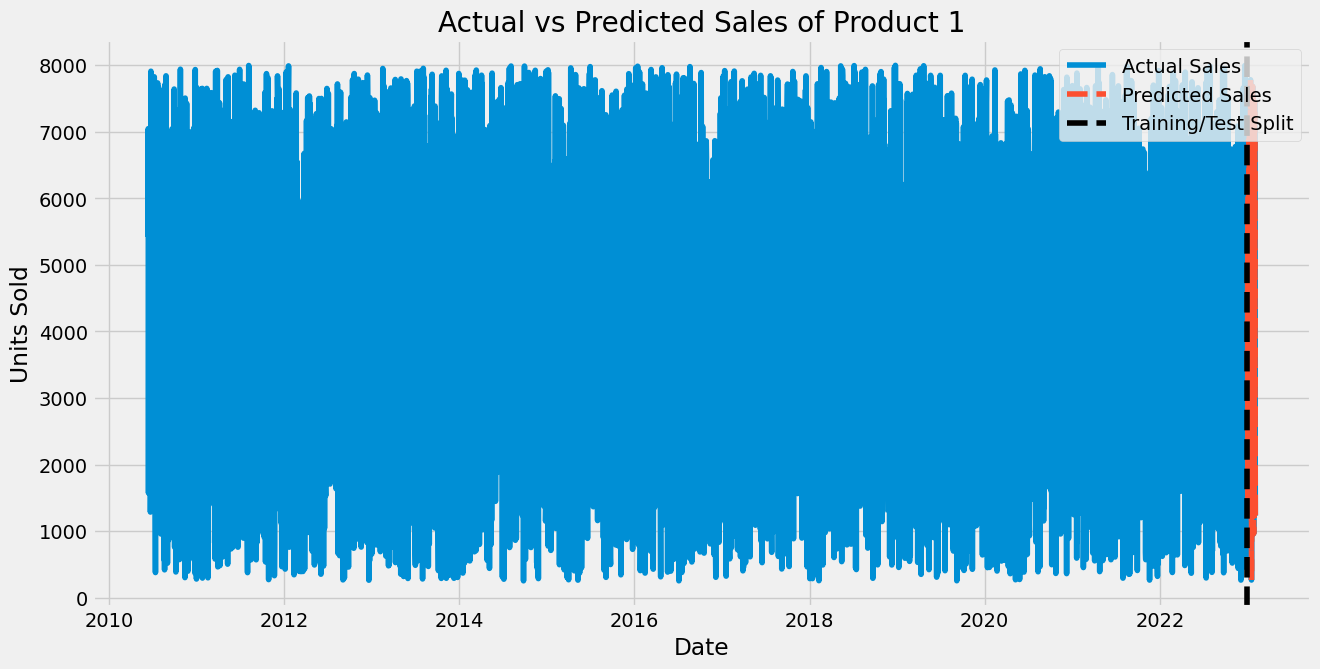

In [15]:
train_data = df.loc[df.index < '2023-01-01']
test_data = df.loc[df.index >= '2023-01-01']

X_train = train_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]  
y_train = train_data['Q-P1'] 

model = LinearRegression()
model.fit(X_train, y_train)

X_test = test_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
test_data['Predicted_Q-P1'] = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Q-P1'], label='Actual Sales')
plt.plot(test_data.index, test_data['Predicted_Q-P1'], label='Predicted Sales', linestyle='--')
plt.axvline(pd.to_datetime('2023-01-01'), color='Black', linestyle='--', label='Training/Test Split')
plt.title('Actual vs Predicted Sales of Product 1')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

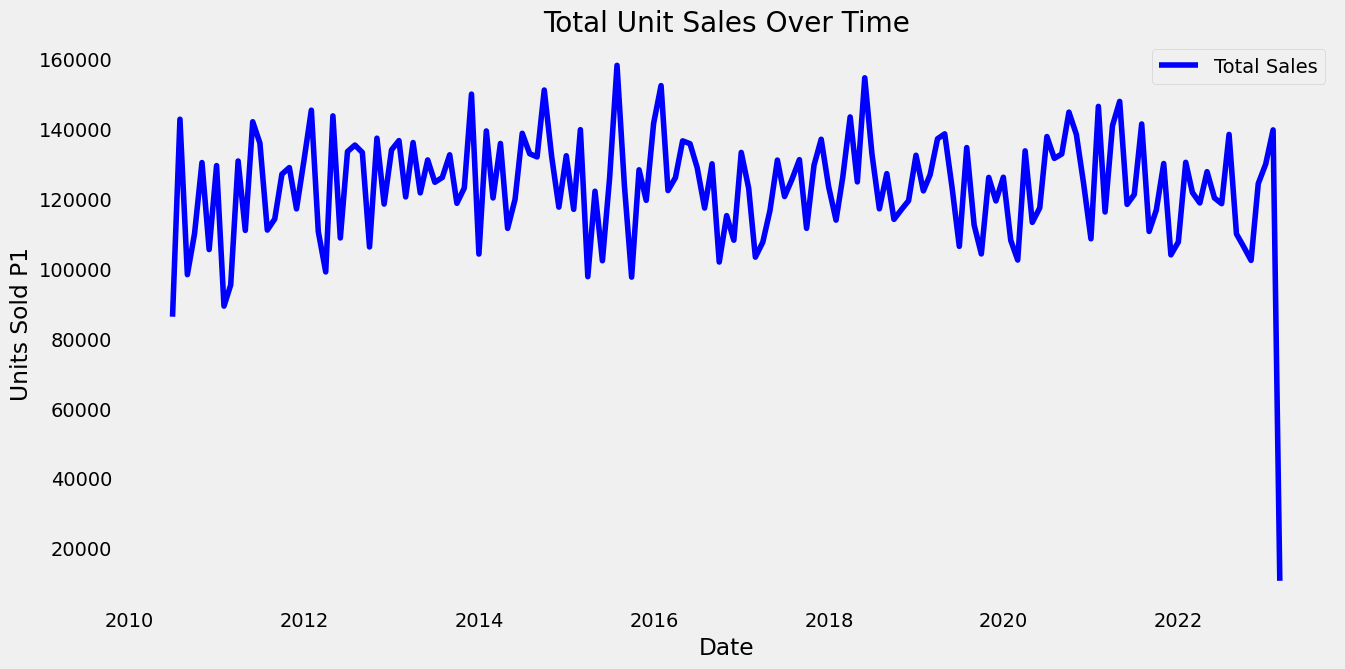

In [14]:



# Grouping by date to get total sales per month
sales_time_series = df['Q-P1'].resample('M').sum()

plt.figure(figsize=(14, 7))
plt.plot(sales_time_series.index, sales_time_series, label='Total Sales', color='blue')
plt.title('Total Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold P1')
plt.legend()
plt.grid()
plt.show()




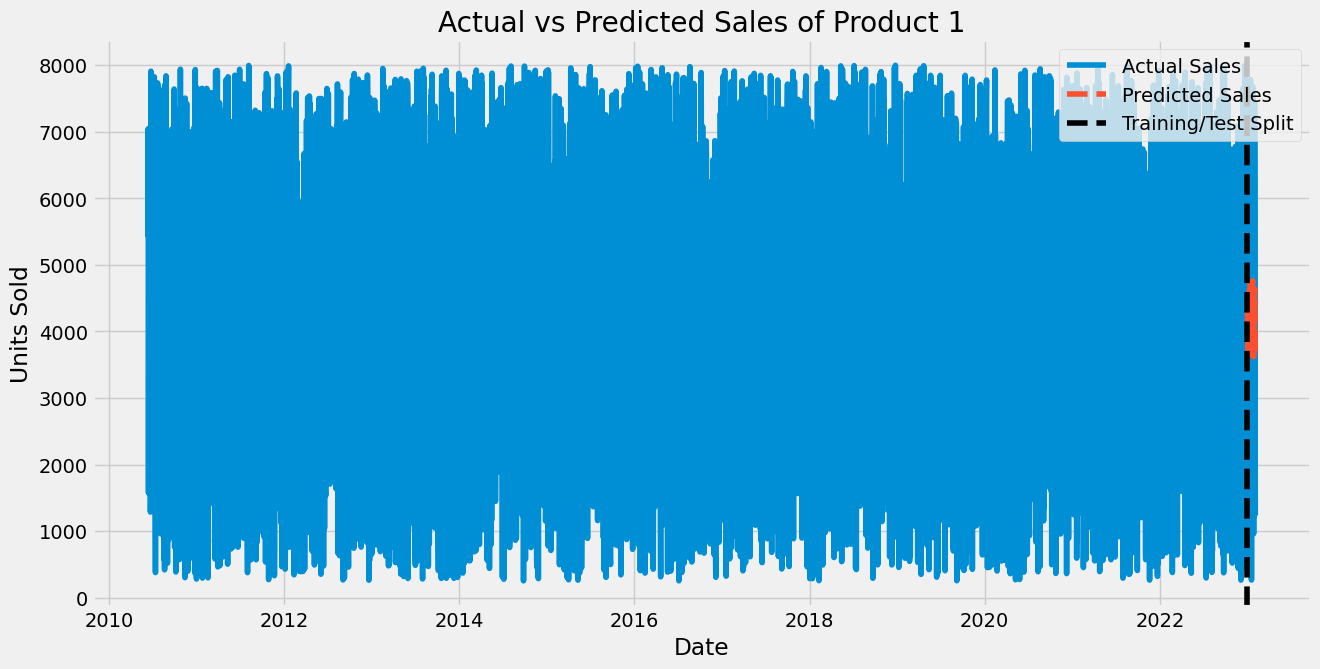

In [16]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

 

# Assuming 'df' is your DataFrame and it's already defined

 

# Split the data into training and testing sets
train_data = df.loc[df.index < '2023-01-01']
test_data = df.loc[df.index >= '2023-01-01']

 

# Define the features (X) and target (y) for training
X_train = train_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
y_train = train_data['Q-P1']

 

# Initialize and train the SVM model
model = SVR(kernel='rbf')  # You can choose other kernels like 'linear', 'poly', etc.
model.fit(X_train, y_train)

 

# Predict using the test set
X_test = test_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
test_data['Predicted_Q-P1'] = model.predict(X_test)

 

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Q-P1'], label='Actual Sales')
plt.plot(test_data.index, test_data['Predicted_Q-P1'], label='Predicted Sales', linestyle='--')
plt.axvline(pd.to_datetime('2023-01-01'), color='Black', linestyle='--', label='Training/Test Split')
plt.title('Actual vs Predicted Sales of Product 1')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()



In [17]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Split the data into training and testing sets

train_data = df.loc[df.index < '2023-01-01']

test_data = df.loc[df.index >= '2023-01-01']
 
# Define the features (X) and target (y) for training

X_train = train_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]

y_train = train_data['Q-P1']
 
# Initialize and train the Linear Regression model

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
 
# Predict using the test set

X_test = test_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]

test_data['Predicted_Q-P1_LR'] = lr_model.predict(X_test)
 
# Evaluate the Linear Regression model

mae_lr = mean_absolute_error(test_data['Q-P1'], test_data['Predicted_Q-P1_LR'])

mse_lr = mean_squared_error(test_data['Q-P1'], test_data['Predicted_Q-P1_LR'])

r2_lr = r2_score(test_data['Q-P1'], test_data['Predicted_Q-P1_LR'])
 
print("Linear Regression Model Evaluation:")

print(f"Mean Absolute Error (MAE): {mae_lr}")

print(f"Mean Squared Error (MSE): {mse_lr}")

print(f"R-squared (R²) Score: {r2_lr}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 5.433562096989001e-13
Mean Squared Error (MSE): 4.467573597899567e-25
R-squared (R²) Score: 1.0


In [18]:
# Initialize and train the SVM model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
 
# Predict using the test set
test_data['Predicted_Q-P1_SVR'] = svr_model.predict(X_test)
 
# Evaluate the SVR model
mae_svr = mean_absolute_error(test_data['Q-P1'], test_data['Predicted_Q-P1_SVR'])
mse_svr = mean_squared_error(test_data['Q-P1'], test_data['Predicted_Q-P1_SVR'])
r2_svr = r2_score(test_data['Q-P1'], test_data['Predicted_Q-P1_SVR'])
 
print("Support Vector Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared (R²) Score: {r2_svr}")

Support Vector Regression Model Evaluation:
Mean Absolute Error (MAE): 1634.2439252429244
Mean Squared Error (MSE): 3445488.453518185
R-squared (R²) Score: 0.28733939163905864


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Assuming 'df' is your DataFrame and it's already defined
 
# Split the data into training and testing sets
train_data = df.loc[df.index < '2023-01-01']
test_data = df.loc[df.index >= '2023-01-01']
 
# Define the features (X) and target (y) for training
X_train = train_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
y_train = train_data['Q-P1']
X_test = test_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
 
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
 
# Predict using the test set
test_data['Predicted_Q-P1_RF'] = rf_model.predict(X_test)
 
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(test_data['Q-P1'], test_data['Predicted_Q-P1_RF'])
mse_rf = mean_squared_error(test_data['Q-P1'], test_data['Predicted_Q-P1_RF'])
r2_rf = r2_score(test_data['Q-P1'], test_data['Predicted_Q-P1_RF'])
 
# Print Evaluation Metrics
print("Random Forest Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²) Score: {r2_rf}")

Random Forest Regression Model Evaluation:
Mean Absolute Error (MAE): 1.1523529411765192
Mean Squared Error (MSE): 2.661652941176437
R-squared (R²) Score: 0.9999994494669682


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Assuming 'df' is your DataFrame and it's already defined
 
# Split the data into training and testing sets
train_data = df.loc[df.index < '2023-01-01']
test_data = df.loc[df.index >= '2023-01-01']
 
# Define the features (X) and target (y) for training
X_train = train_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
y_train = train_data['Q-P1']
X_test = test_data[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
 
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
 
# Predict using the test set
test_data['Predicted_Q-P1_DT'] = dt_model.predict(X_test)
 
# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(test_data['Q-P1'], test_data['Predicted_Q-P1_DT'])
mse_dt = mean_squared_error(test_data['Q-P1'], test_data['Predicted_Q-P1_DT'])
r2_dt = r2_score(test_data['Q-P1'], test_data['Predicted_Q-P1_DT'])
 
# Print Evaluation Metrics
print("Decision Tree Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R-squared (R²) Score: {r2_dt}")

Decision Tree Regression Model Evaluation:
Mean Absolute Error (MAE): 1.5
Mean Squared Error (MSE): 4.088235294117647
R-squared (R²) Score: 0.999999154394423
